### Context
This is data that confirmed the grade of performance with age and some exercise performance data.

Content
data shape : (13393, 12)

* age : 20 ~64
* gender : F,M
* height_cm : (If you want to convert to feet, divide by 30.48)
* weight_kg
* body fat_%
* diastolic : diastolic blood pressure (min)
* systolic : systolic blood pressure (min)
* gripForce
*  and bend forward_cm
* sit-ups counts
* broad jump_cm
* class : A,B,C,D ( A: best) / stratified


In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

pd.options.display.width = 0
pd.options.display.max_rows = 10000
pd.options.display.max_info_columns = 10000

In [2]:
# Migration to sql_lite database -> bodyperformance table

conn = sqlite3.connect("my_db.db")
cur = conn.cursor()
df = pd.read_csv("data.csv")
df.to_sql("bodyPerformance", conn, if_exists='append', index=False)

In [3]:
data = pd.read_sql("SELECT * from bodyPerformance", conn)
data.head(100)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27.0      M      172.3      75.24    21.30000       80.0     130.0   
1   25.0      M      165.0      55.80    15.70000       77.0     126.0   
2   31.0      M      179.6      78.00    20.10000       92.0     152.0   
3   32.0      M      174.5      71.10    18.40000       76.0     147.0   
4   28.0      M      173.8      67.70    17.10000       70.0     127.0   
5   36.0      F      165.4      55.40    22.00000       64.0     119.0   
6   42.0      F      164.5      63.70    32.20000       72.0     135.0   
7   33.0      M      174.9      77.20    36.90000       84.0     137.0   
8   54.0      M      166.8      67.50    27.60000       85.0     165.0   
9   28.0      M      185.0      84.60    14.40000       81.0     156.0   
10  42.0      M      169.2      65.40    19.30000       63.0     110.0   
11  57.0      F      153.0      49.00    20.90000       69.0     106.0   
12  27.0      F      156.0      53.90    35.50000       69.0     116.0   
13  22.0      M      175.7      67.90    11.30000       71.0     103.0   
14  24.0      M      181.0      84.40    20.40000       80.0     120.0   
15  45.0      F      159.0      63.10    30.90000       93.0     144.0   
16  25.0      F      164.2      66.60    30.20000       82.0     120.0   
17  26.0      M      179.9      71.50     9.70000       64.0     135.0   
18  26.0      M      169.2      70.60    21.00000       63.0     129.0   
19  21.0      F      162.7      47.20    18.90000       78.0     133.0   
20  25.0      F      161.7      63.36    31.30000       89.0     128.0   
21  59.0      F      155.9      62.70    30.20000       76.0     143.0   
22  38.0      M      166.7      67.30    23.20000       70.0     111.0   
23  44.0      M      170.0      63.30    12.90000       65.0     115.0   
24  23.0      F      164.1      59.40    29.60000       91.0     126.0   
25  62.0      M      169.0      70.70    30.50000       96.0     146.0   
26  47.0      F      158.3      53.50    29.20000       70.0     117.0   
27  48.0      M      175.8      84.50    31.40000       83.0     125.0   
28  36.0      M      176.0      81.30    24.50000       81.0     139.0   
29  50.0      F      159.8      57.10    24.40000       63.0     103.0   
30  25.0      M      170.9      70.70    15.70000       80.0     127.0   
31  26.0      M      176.7      77.20    16.30000       66.0     129.0   
32  28.0      F      159.5      51.54    24.50000       82.0     123.0   
33  30.0      M      172.1      79.50    26.70000       91.0     148.0   
34  49.0      F      151.5      52.00    27.60000       77.0     144.0   
35  40.0      M      177.6      88.60    20.30000       93.0     138.0   
36  21.0      M      172.5      66.40    12.50000       82.0     130.0   
37  31.0      M      177.5      79.50    23.00000       90.0     148.0   
38  32.0      M      178.0      84.50    21.20000       68.0     130.0   
39  27.0      M      177.6      79.70    22.80000       59.0     108.0   
40  42.0      M      168.0      61.00    14.90000       94.0     151.0   
41  52.0      M      173.6      84.90    30.30000       93.0     144.0   
42  39.0      M      173.3      69.80    23.80000       76.0     137.0   
43  33.0      F      159.6      60.50    32.10000       62.0     106.0   
44  25.0      F      161.8      57.70    21.70000       74.0     115.0   
45  31.0      M      169.9      73.10    19.20000       97.0     145.0   
46  34.0      M      183.6      76.82    16.30000       80.0     120.0   
47  26.0      M      172.1      66.10    24.90000       62.0     102.0   
48  28.0      M      180.1      82.10    15.00000       83.0     147.0   
49  58.0      M      164.2      64.00    19.80000       93.0     150.0   
50  48.0      M      169.8      75.40    14.70000       94.0     149.0   
51  23.0      M      180.1      65.90    14.40000       72.0     130.0   
52  38.0      F      157.2      51.70    27.30000       64.0     106.0   
53  43.0 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
data['class'] = data['class'].astype('category')
data['gender'] = data['gender'].astype('category')

In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      13393 non-null  float64 
 1   gender                   13393 non-null  category
 2   height_cm                13393 non-null  float64 
 3   weight_kg                13393 non-null  float64 
 4   body fat_%               13393 non-null  float64 
 5   diastolic                13393 non-null  float64 
 6   systolic                 13393 non-null  float64 
 7   gripForce                13393 non-null  float64 
 8   sit and bend forward_cm  13393 non-null  float64 
 9   sit-ups counts           13393 non-null  float64 
 10  broad jump_cm            13393 non-null  float64 
 11  class                    13393 non-null  category
dtypes: category(2), float64(10)
memory usage: 1.0 MB


In [8]:
## preliminary data mining, correlations, data distributions

data.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

## Analiza normalności rozkładu

### 1. Weryfikacja z użycie podstawowych statystyk

In [9]:
data.agg(["mean", "median"])

age   height_cm  weight_kg  body fat_%  diastolic    systolic  \
mean    36.775106  168.559807  67.447316   23.240165  78.796842  130.234817   
median  32.000000  169.200000  67.400000   22.800000  79.000000  130.000000   

        gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
mean    36.963877                15.209268       39.771224     190.129627  
median  37.900000                16.200000       41.000000     193.000000

In [10]:
data.skew().sort_values()

# Współczynnik o wartości ~ 0 to rozkład symetryczny.
# Współczynnik o wartości ujemnej to rozkład lewostronnie skośny (wydłużone lewe ramię rozkładu; średnia mniejsza od mediany).
# Współczynnik o wartości dodatniej to rozkład prawostronnie skośny (wydłużone prawe ramię rozkładu; średniej większa od mediany).

sit-ups counts            -0.467830
broad jump_cm             -0.422623
height_cm                 -0.186882
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
weight_kg                  0.349805
body fat_%                 0.361132
age                        0.599896
sit and bend forward_cm    0.785492
dtype: float64

In [11]:
# Kurtoza jest miarą spłaszczenia rozkładu. Mówi o tym, jak bardzo względem rozkładu normalnego jest spłaszczony (ujemne wartości kurtozy) 
# lub wydęty (dodatnie wartości kurtozy) rozkład badanej zmiennej.

data.kurtosis().abs().sort_values()

broad jump_cm               0.002397
body fat_%                  0.128712
sit-ups counts              0.156326
weight_kg                   0.171606
diastolic                   0.363525
systolic                    0.380285
height_cm                   0.433053
gripForce                   0.822200
age                         1.017671
sit and bend forward_cm    35.220856
dtype: float64

In [12]:
data.agg(['kurtosis', 'skew']).T

kurtosis      skew
age                      -1.017671  0.599896
height_cm                -0.433053 -0.186882
weight_kg                 0.171606  0.349805
body fat_%                0.128712  0.361132
diastolic                 0.363525 -0.159637
systolic                  0.380285 -0.048654
gripForce                -0.822200  0.018456
sit and bend forward_cm  35.220856  0.785492
sit-ups counts           -0.156326 -0.467830
broad jump_cm             0.002397 -0.422623

Na poodstawie powyższych informacji o skośności i kurtozie można stwierdzić, że najbliżej normalności są zmienne: "broad jump_cm", "body_fat_%", "sit-ups counts"

### 2. Wizualizacja rozkładów z użyciem wykresu gęstości.

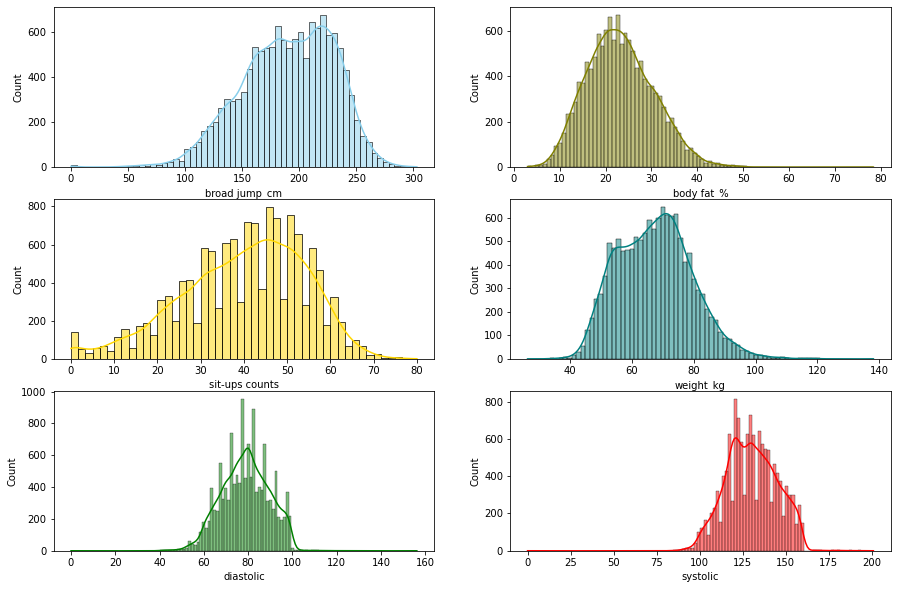

In [13]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(data['broad jump_cm'], color='skyblue', ax=axes[0, 0], kde=True)
sns.histplot(data['body fat_%'], color='olive', ax=axes[0, 1], kde=True)
sns.histplot(data['sit-ups counts'], color='gold', ax=axes[1, 0], kde=True)
sns.histplot(data['weight_kg'], color='teal', ax=axes[1, 1], kde=True)
sns.histplot(data['diastolic'], color='green', ax=axes[2, 0], kde=True)
sns.histplot(data['systolic'], color='red', ax=axes[2, 1], kde=True)

plt.show()

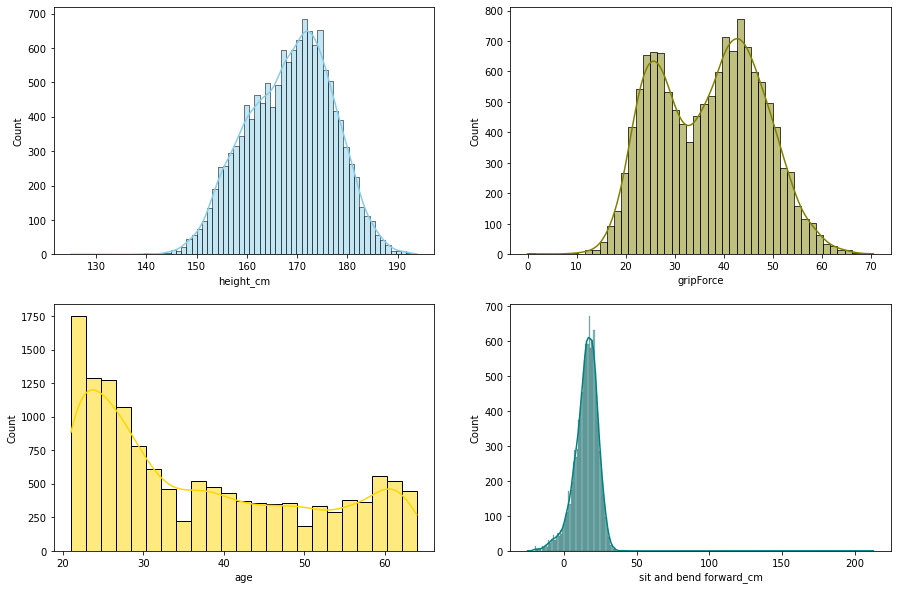

In [14]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data['height_cm'], color='skyblue', ax=axes[0, 0], kde=True)
sns.histplot(data['gripForce'], color='olive', ax=axes[0, 1], kde=True)
sns.histplot(data['age'], color='gold', ax=axes[1, 0], kde=True)
sns.histplot(data['sit and bend forward_cm'], color='teal', ax=axes[1, 1], kde=True)

plt.show()

### 3. Test na normalność rozkładu

* H0 -> brak podstaw na odrzucenie hipotezy zerowej - przyjmuję, że zmienna pochodzi z rozkładu normalnego,
* H1 -> odrzucam hipotezę zerową - przyjmuję hipotezę alternatywną - zmienna nie pochodzi z rozkładu normalnego

In [34]:
results = {}
for feature in data.describe().columns:
    alpha = 0.05
    p_value = scipy.stats.normaltest(data[feature])[1]
    results[feature] = [p_value]
    if(p_value < alpha):
        print(f'Dla zmiennej {feature} odrzucam hipotezę zerową.\n Zmienna NIE POCHODZI z rozkładu normalnego. P-value:', p_value)
    else:
        print(f'Dla zmiennej {feature} nie wykryto podstaw do odrzucenia hipitezy zerowej.\n Zmienna POCHODZI z rozkładu normalnego. P-value:', p_value)

Dla zmiennej age odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej height_cm odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 3.2789893137248846e-55
Dla zmiennej weight_kg odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 7.421263887222427e-60
Dla zmiennej body fat_% odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 4.589613062607709e-62
Dla zmiennej diastolic odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 1.3677636843739895e-24
Dla zmiennej systolic odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 1.869779381907141e-14
Dla zmiennej gripForce odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 5.483023135552057e-275
Dla zmiennej sit and bend forward_cm odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej sit-ups coun

W zbiorze żadna ze zmiennych nie cechuje się rozkładem normalnym.

### 4. Test Shapiro-Wilka

In [36]:
for feature in data.describe().columns:
    alpha = 0.05
    p_value = scipy.stats.shapiro(data[feature])[1]
    results[feature].append(p_value)
    if(p_value < alpha):
        print(f'Dla zmiennej {feature} odrzucam hipotezę zerową.\n Zmienna NIE POCHODZI z rozkładu normalnego. P-value:', p_value)
    else:
        print(f'Dla zmiennej {feature} nie wykryto podstaw do odrzucenia hipitezy zerowej.\n Zmienna POCHODZI z rozkładu normalnego. P-value:', p_value)

Dla zmiennej age odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej height_cm odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 4.0027973296320326e-25
Dla zmiennej weight_kg odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 6.533103728282568e-31
Dla zmiennej body fat_% odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 6.160797595272053e-28
Dla zmiennej diastolic odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 8.037031445227428e-29
Dla zmiennej systolic odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 6.242718537612497e-31
Dla zmiennej gripForce odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 1.9307034189528757e-39
Dla zmiennej sit and bend forward_cm odrzucam hipotezę zerową.
 Zmienna NIE POCHODZI z rozkładu normalnego. P-value: 0.0
Dla zmiennej sit-ups count

/home/tm/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


W zbiorze żadna ze zmiennych nie cechuje się rozkładem normalnym.

Założony poziom istnotności alpha = 0.05. Zmienne o p_value > 0.05 można określić jako zmienne o rozkładnie normlanym. W zbiorze danych wszystkie zmienne znajdują się daleko od tej granicy, nabliżej są dane związane z ciśnieniem krwi -> systolic i diastolic oraz wzrost -> height_cm

Zarówno test Shapiro-Wilka jak i D'Agostino-Pearson wskazały że zmienne nie mają rozkładu normalnego.

## Korelacje

In [17]:
data.corr()

age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.293980  -0.099966    0.242302   
height_cm               -0.293980   1.000000   0.734909   -0.515440   
weight_kg               -0.099966   0.734909   1.000000   -0.084065   
body fat_%               0.242302  -0.515440  -0.084065    1.000000   
diastolic                0.158508   0.145933   0.262317    0.048059   
systolic                 0.211167   0.210186   0.338943   -0.030376   
gripForce               -0.179583   0.735024   0.700119   -0.541788   
sit and bend forward_cm -0.070033  -0.221970  -0.296249   -0.071225   
sit-ups counts          -0.544581   0.500424   0.294899   -0.608912   
broad jump_cm           -0.435172   0.674589   0.479564   -0.673273   

                         diastolic  systolic  gripForce  \
age                       0.158508  0.211167  -0.179583   
height_cm                 0.145933  0.210186   0.735024   
weight_kg                 0.262317  0.338943   0.700119   
body fat_%                0.048059 -0.030376  -0.541788   
diastolic                 1.000000  0.676309   0.202062   
systolic                  0.676309  1.000000   0.286012   
gripForce                 0.202062  0.286012   1.000000   
sit and bend forward_cm  -0.072098 -0.082434  -0.112577   
sit-ups counts            0.016547  0.056276   0.576669   
broad jump_cm             0.097243  0.152894   0.746853   

                         sit and bend forward_cm  sit-ups counts  \
age                                    -0.070033       -0.544581   
height_cm                              -0.221970        0.500424   
weight_kg                              -0.296249        0.294899   
body fat_%                             -0.071225       -0.608912   
diastolic                              -0.072098        0.016547   
systolic                               -0.082434        0.056276   
gripForce                              -0.112577        0.576669   
sit and bend forward_cm                 1.000000        0.177153   
sit-ups counts                          0.177153        1.000000   
broad jump_cm                           0.026487        0.748273   

                         broad jump_cm  
age                          -0.435172  
height_cm                     0.674589  
weight_kg                     0.479564  
body fat_%                   -0.673273  
diastolic                     0.097243  
systolic                      0.152894  
gripForce                     0.746853  
sit and bend forward_cm       0.026487  
sit-ups counts                0.748273  
broad jump_cm                 1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

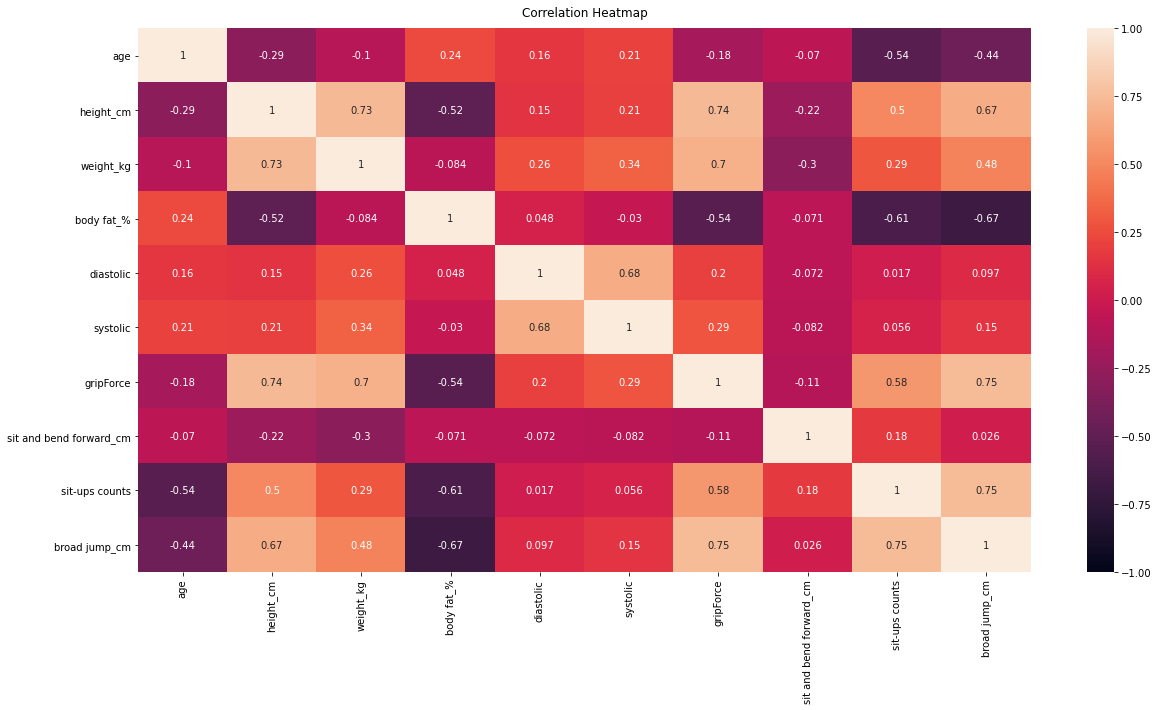

In [18]:
# heatmap - correlation matrix
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

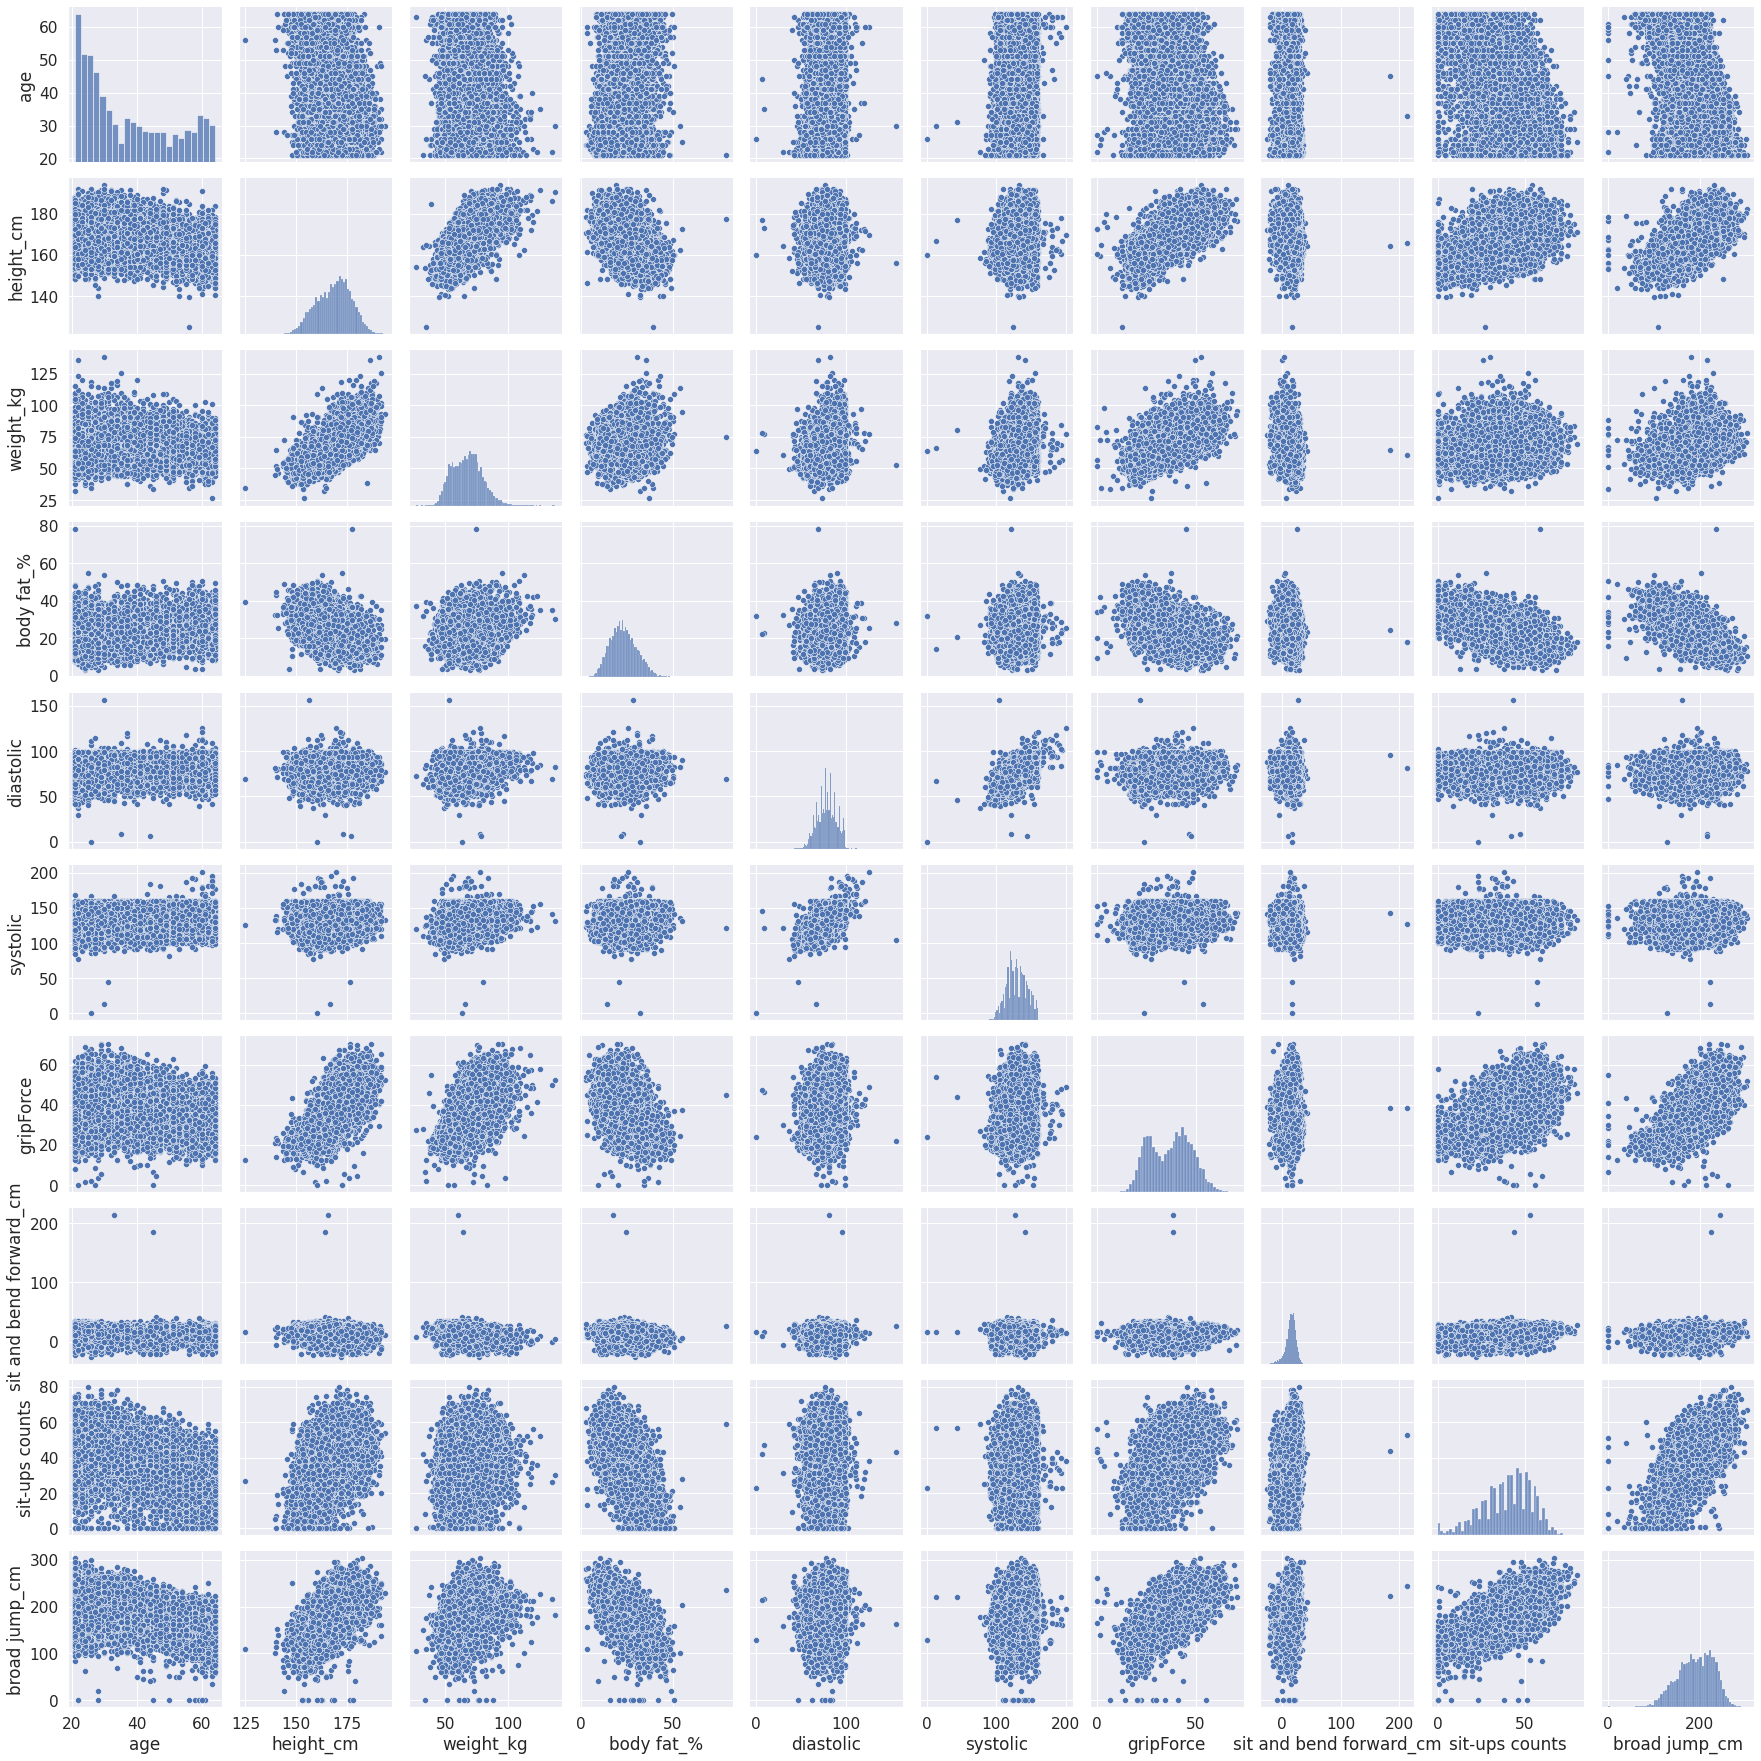

In [19]:
## zależności zmiennych - zobrazowanie wszystkich korelacji

sns.set(font_scale=1.4)
sns.pairplot(data=data, diag_kind='hist')

In [20]:
data.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

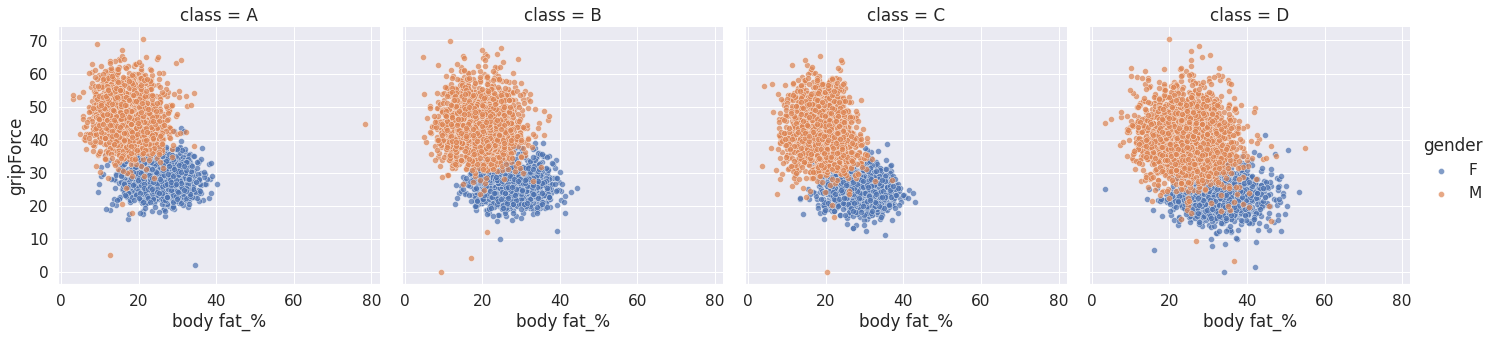

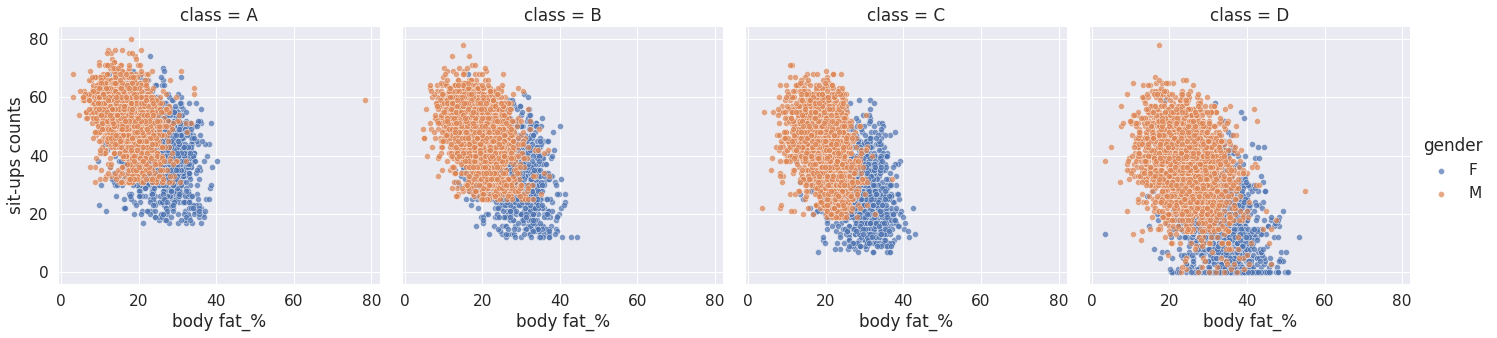

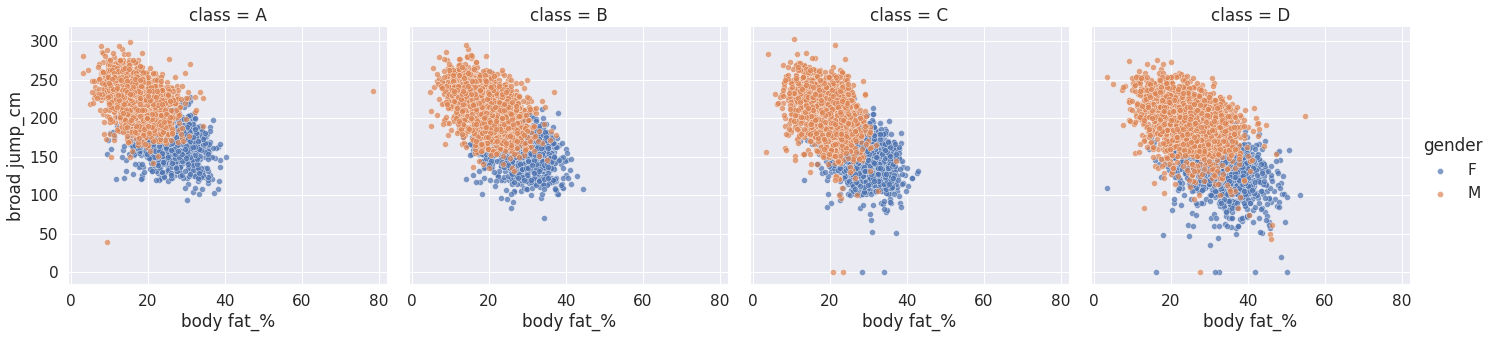

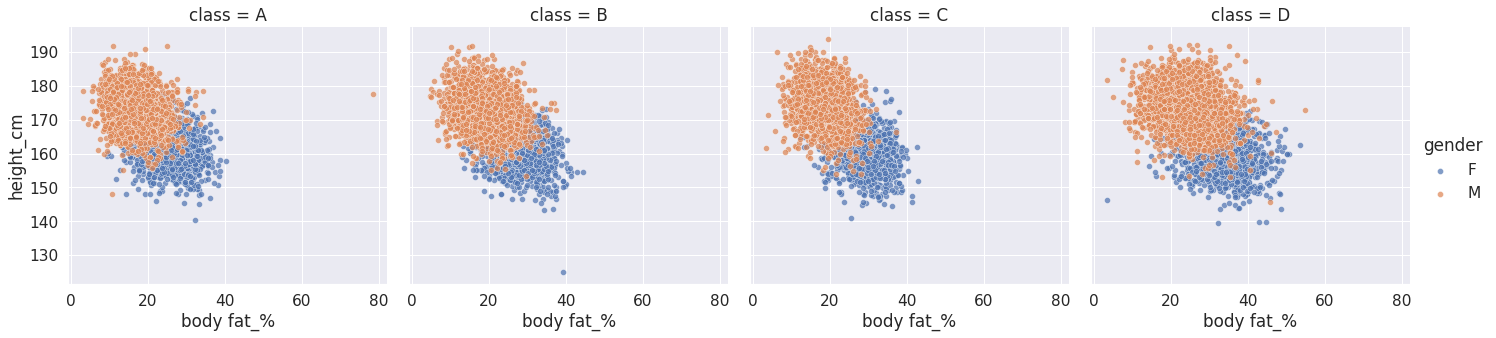

In [21]:
# Zmienne skorelowane

g1 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g1.map(sns.scatterplot, "body fat_%", "gripForce", alpha=.7)
g1.add_legend()

g2 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g2.map(sns.scatterplot, "body fat_%", "sit-ups counts", alpha=.7)
g2.add_legend()

g3 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g3.map(sns.scatterplot, "body fat_%", "broad jump_cm", alpha=.7)
g3.add_legend()

g4 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g4.map(sns.scatterplot, "body fat_%", "height_cm", alpha=.7)
g4.add_legend()

## Wnioski

Jak widać na powyższych wykresach poziom tkanki tłuczowej ma znaczący wpływ na wyniki osiągnieć fizycznych takich jak siła uścisku dłoni, skok w dal, ilość przysiadów. Widać również, że osoby wyższe wykazują mniejszą tendencję do posiadania wysokiego % tkanki tłuszczowej. Lepsze rezulaty uzyskali mężczyźni. Osoby zakwalifikowane do klasy A mają znacznie niższy udział tkanku tłusczowej niż osoby z niższych klas (B-C)

<Figure size 1080x576 with 0 Axes>

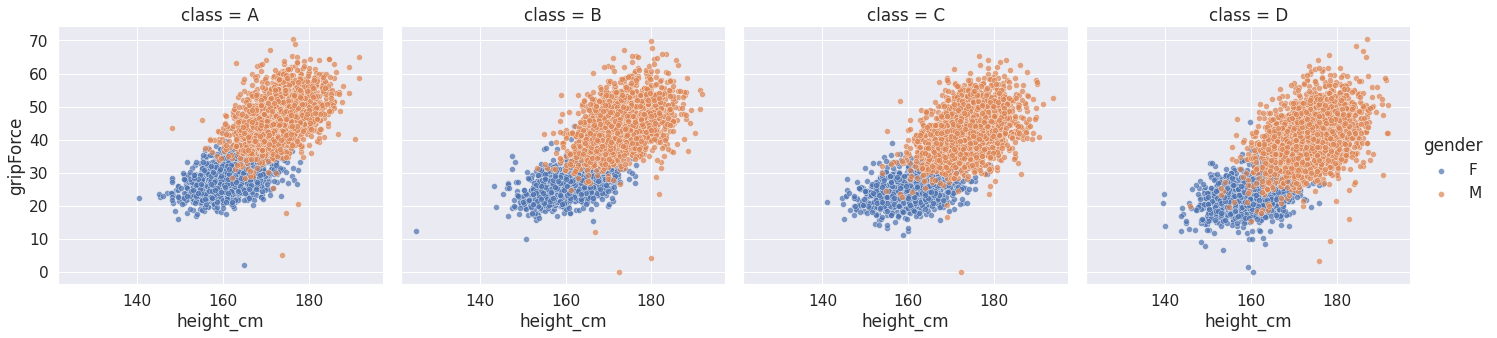

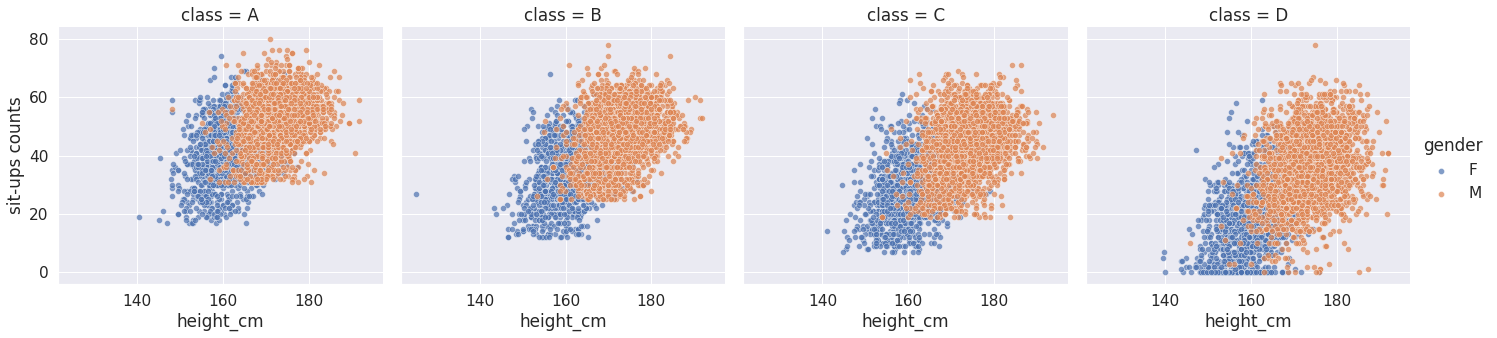

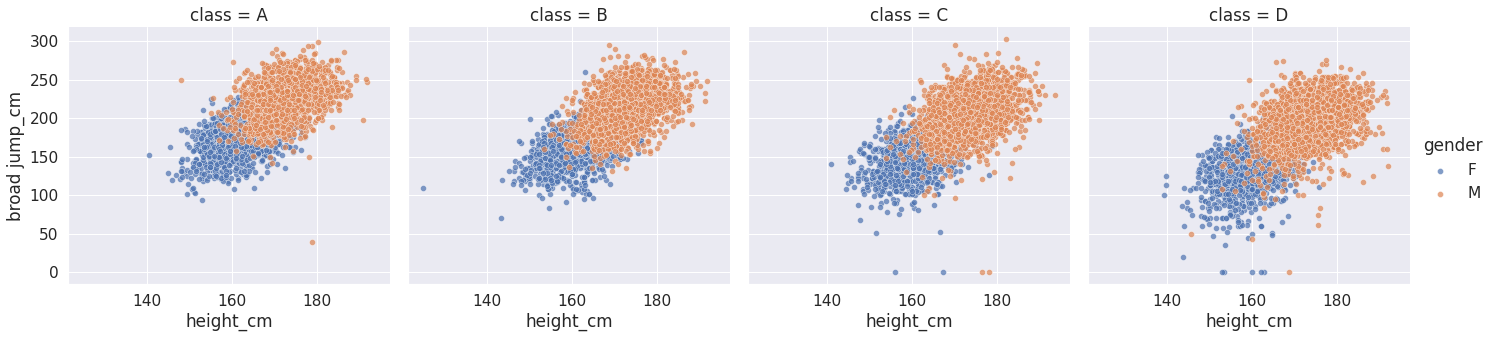

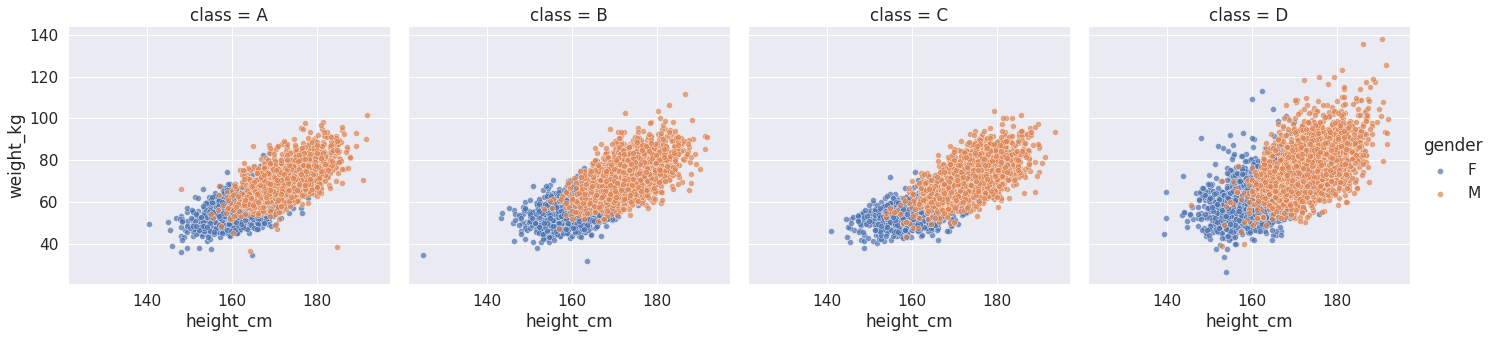

In [22]:
plt.figure(figsize=(15,8))

g1 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g1.map(sns.scatterplot, "height_cm", "gripForce", alpha=.7)
g1.add_legend()

g2 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g2.map(sns.scatterplot, "height_cm", "sit-ups counts", alpha=.7)
g2.add_legend()

g3 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g3.map(sns.scatterplot, "height_cm", "broad jump_cm", alpha=.7)
g3.add_legend()

g4 = sns.FacetGrid(data, col="class", hue="gender", height=5)
g4.map(sns.scatterplot, "height_cm", "weight_kg", alpha=.7)
g4.add_legend()

## Wnioski

Na podstawie powyższych korelacji możemy zaobserwować, że osoby wyższe mają lepsze wyniki fizyczne.

Zaskakujący jest brak związku wieku i osiągnieć fizycznych. Delikatną tendencję zaobserwowano w przypadku skoku w dal, ale już pozostałe 'dyscypliny' rozkładają się w równych proporcjach - zarówno osoby starsze jak i młodsze mają lepsze i gorsze rezultaty.

W przypadku wagi korelację zaobserwowano z usciskiem dłoni - osoby cięższe mają ten uścisk zdecydowanie mocniejszy.

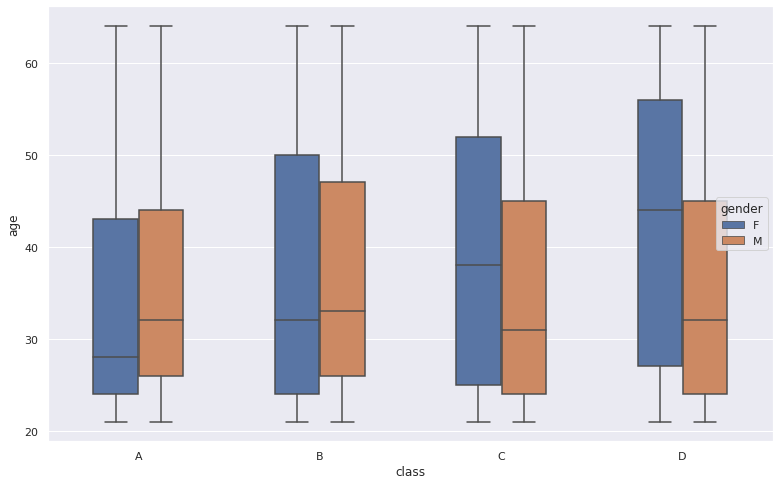

In [23]:
sns.set(font_scale=1)
plt.figure(figsize=(13,8))
ax = sns.boxplot(x="class", y="age", data=data, hue="gender", width=0.5)

## Analiza wiek vs klasyfikacja

Z powyższego wykresu pudełkowego można wywnioskować, że w przypadku kobiet wraz z niższą klasą (na postawie wyników aktywności fizycznych) wzrasta mediana wieku - w przypadky klasy A medianya oscyluje w granicach 28 lat w przypadku klasy D jest to wartość powyżej 40 lat. W przypadu mężczyzn nie ma takiej tendencji - mediana jest w miarę stabilna i wiek nie ma takiego wpływu na klasyfiację.

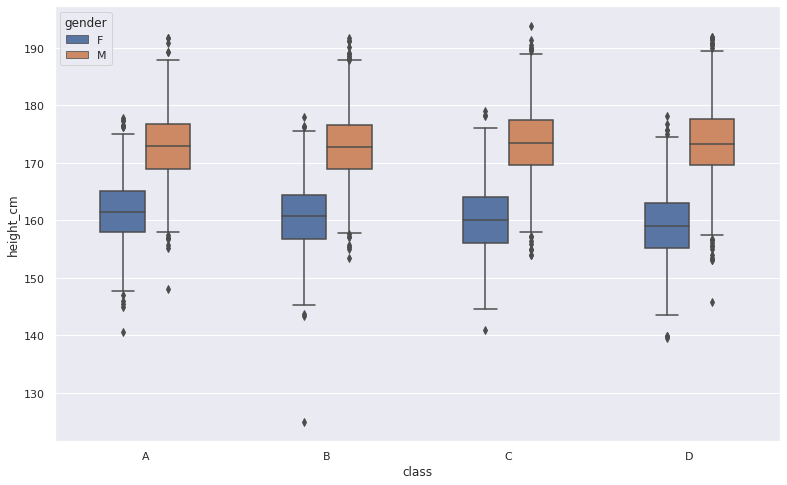

In [24]:
sns.set(font_scale=1)
plt.figure(figsize=(13,8))
ax = sns.boxplot(x="class", y="height_cm", data=data, hue="gender", width=0.5)

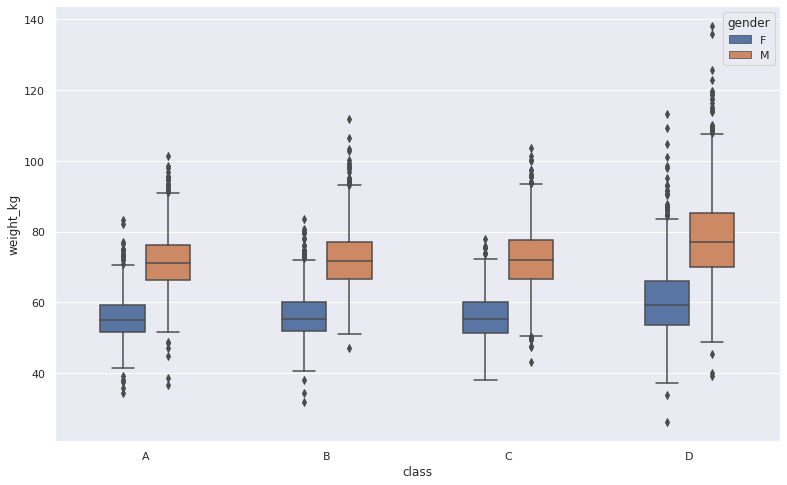

In [25]:
sns.set(font_scale=1)
plt.figure(figsize=(13,8))
ax = sns.boxplot(x="class", y="weight_kg", data=data, hue="gender", width=0.5)

## Wnioski klasyfikacja vs wzrost / waga
Jak widać na powyższch wykresach pudełkowych wzrost nie ma wpływu na klasyfikację (mediana jest w miarę stabilna), w przypadku wagi tendencję widać w przypadku klasy najniższej - D, mediana jest tam większa zarówno w przypadku kobiet jak i meżczyzn.